In [2]:

import os
import glob
import h5py
from PIL import Image
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import numpy as np

In [22]:


import keras
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( preprocessing_function= preprocess_input,
                                   horizontal_flip = True,
                                     rescale=1./255 )


validation_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                        horizontal_flip = True,
                                        rescale=1./255)

train_data = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/water analysis/split data/train',
                    target_size=(224, 224), batch_size= 16)

batches = validation_datagen.flow_from_directory(
                    '/content/drive/MyDrive/water analysis/split data/val',
                   target_size=(224,224),batch_size= 49)
                    

Found 190 images belonging to 3 classes.
Found 49 images belonging to 3 classes.


In [23]:

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

imgs, labels = next(batches)

batches.class_indices

{'clean water': 0, 'lake': 1, 'pound': 2}

In [24]:





categories = {
'clean water': 0, 'lake': 1, 'pound': 2
}

categories

{'clean water': 0, 'lake': 1, 'pound': 2}

In [25]:

'''from sklearn.model_selection import train_test_split
# Train, validation and test split

X_val, X_test, y_val, y_test = train_test_split(imgs,labels, test_size=0.2, random_state=7)

'''

'from sklearn.model_selection import train_test_split\n# Train, validation and test split\n\nX_val, X_test, y_val, y_test = train_test_split(imgs,labels, test_size=0.2, random_state=7)\n\n'

In [26]:


'''print("*-*-*-*-*-*")
print("Train")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)
'''

'print("*-*-*-*-*-*")\nprint("Train")\nprint(X_val.shape)\nprint(y_val.shape)\n\nprint("*-*-*-*-*-*")\nprint("Test")\nprint(X_test.shape)\nprint(y_test.shape)\n'

In [27]:
from tensorflow.keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

17235968/17225924 [==============================] - 0s 0us/step


In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
#model.add(data_augmentation)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(3, activation='softmax'))

In [29]:



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               25690624  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                      

In [30]:


model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [31]:

history = model.fit(
                    train_data,
                    validation_data = (imgs, labels),
                    epochs=50)

Epoch 1/50
12/12 [==============================] - 9s 303ms/step - loss: 16.6257 - accuracy: 0.5632 - val_loss: 287.3000 - val_accuracy: 0.4898
Epoch 2/50
12/12 [==============================] - 2s 148ms/step - loss: 0.3026 - accuracy: 0.8737 - val_loss: 248.9494 - val_accuracy: 0.4898
Epoch 3/50
12/12 [==============================] - 2s 149ms/step - loss: 0.3858 - accuracy: 0.9211 - val_loss: 143.6771 - val_accuracy: 0.4898
Epoch 4/50
12/12 [==============================] - 2s 151ms/step - loss: 0.1118 - accuracy: 0.9684 - val_loss: 101.6709 - val_accuracy: 0.5306
Epoch 5/50
12/12 [==============================] - 2s 150ms/step - loss: 0.1907 - accuracy: 0.9526 - val_loss: 54.7931 - val_accuracy: 0.6327
Epoch 6/50
12/12 [==============================] - 2s 148ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 38.0078 - val_accuracy: 0.6531
Epoch 7/50
12/12 [==============================] - 2s 146ms/step - loss: 0.1531 - accuracy: 0.9684 - val_loss: 9.5524 - val_accuracy: 0.

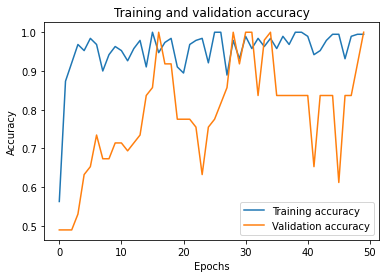

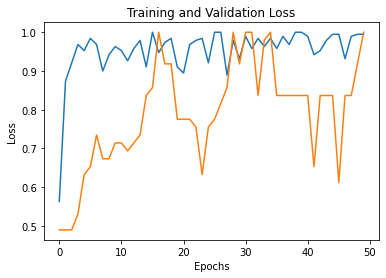

In [34]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [35]:


model.evaluate(imgs, labels)

2/2 [==============================] - 0s 40ms/step - loss: 4.1252e-05 - accuracy: 1.0000


[4.125196937820874e-05, 1.0]

In [36]:

import numpy as np
import pandas as pd



In [37]:
y_pred = model.predict(imgs, verbose=0)



In [38]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(labels, axis=1), np.argmax(y_pred, axis=1))

import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

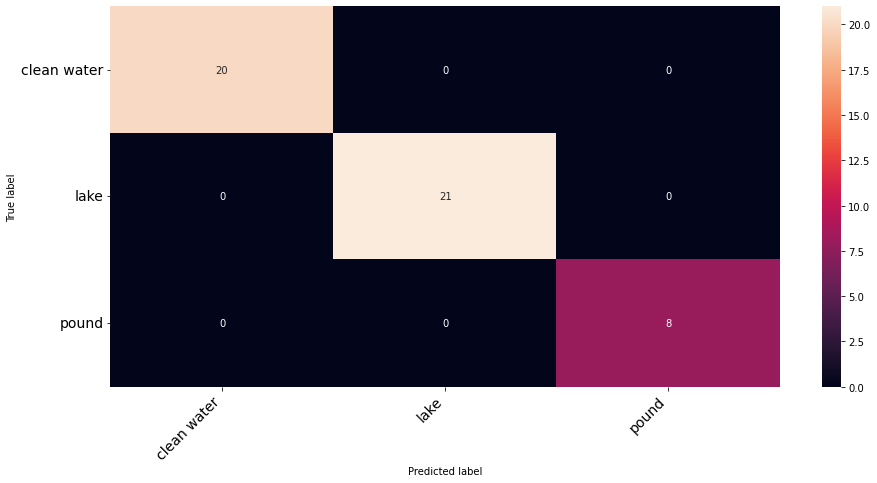

In [39]:
class_names = batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

In [40]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in labels]

from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

